<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_4/Assignment_4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
Zachariah Freitas <br>
Date: 2020-10-01 <br>

Logistic Regression - from sklearn.linear_model import LogisticRegressionCV<br>
classification trees <br>
Bagging - from sklearn.ensemble import BaggingClassifier<br>
AdaBoost - from sklearn.ensemble import AdaBoostClassifier<br>
Random Forest - from sklearn.ensemble import RandomForestClassifier<br>
Linear Discriminant Analysis - LinearDiscriminantAnalysis<br>
Neural Networks - from sklearn.neural_network import MLPClassifier<br>






In [203]:
# Install Book libraries.
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
# # Import required packages for this chapter

# EDA and Preprep
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Classification Model Libraries
from sklearn.linear_model import LogisticRegressionCV # lr or Logistic Regression
from sklearn.ensemble import BaggingClassifier # bc or Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier # abc or Ada Boost Classifier
from sklearn.ensemble import RandomForestClassifier # rf or Random Forest Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # lda or Linear Discriminant Analysis
from sklearn.neural_network import MLPClassifier # nn or Neural Nets
#from sklearn.neighbors import KNeighborsClassifier

# Book Helper Functions
from dmba import plotDecisionTree, gainsChart, liftChart, classificationSummary, regressionSummary
from dmba.metric import AIC_score

# Inline Plot Formating
%matplotlib inline

In [205]:
# Export Data From Colab to Laptop.
# from google.colab import files
# scoreAnalysis.to_csv('filename.csv') 
# files.download('filename.csv')

## Question 1
**Data preparation:** Load the data and prepare it for predictive analysis.

In [206]:
# Dataset Sources
Fundraising = 'https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_4/Assignment_4/Fundraising.csv'
FutureFundraising = 'https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_4/Assignment_4/FutureFundraising.csv'

In [207]:
df = pd.read_csv(Fundraising)
df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [208]:
df_copy = df.copy()

df_copy.columns = [d.replace(' ', '_').replace('.', '') for d in df_copy.columns]
df_copy = df_copy.iloc[: , 2:]
# df_copy = df_copy.drop('TARGET_D', axis=1)
df_copy.head()

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,0,1,0,0,1,1,5,1,9,1399,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,1,0,0,0,1,1,1,0,7,698,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,0,0,0,1,0,2,5,1,8,828,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,0,0,0,1,1,1,3,0,4,1471,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,0,1,0,0,1,1,4,0,8,547,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [209]:
# separate target and predictors
y = df_copy['TARGET_B'].to_numpy()
X = df_copy.drop(['TARGET_B', 'TARGET_D'], axis=1)

# Standardize the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

StandardScaler()

### Question 1.1 
Partition the dataset into 60% training and 40% validation (set the seed to 12345). (4 Points)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

# Normalize the data
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

---
**Answer:** <br>
Test/Train split code above.
---

## Question 2
**Model Building:** Follow the following steps to build, evaluate, and choose a model.

### Question 2.1
Select classification tool and parameters: Run at least two classification models of your choosing. Be sure NOT to use TARGET_D in your analysis. Describe the two models that you chose, with sufficient detail (method, parameters, variables, etc.) so that it can be replicated. (10 Points)


In [211]:
# Helper Functions:
def confusionMatrices(model, title):
  print('\n'+'-'*20)
  print(title + ' - training results\n')
  classificationSummary(y_train, model.predict(X_train_norm))
  print('\n'+'-'*20)
  print(title + ' - validation results\n')
  valid_pred = model.predict(X_test_norm)
  classificationSummary(y_test, valid_pred)


def pred_results(model):
  model_proba = model.predict_proba(X_test_norm)
  pred_results = pd.DataFrame({'actual': y_test.astype("int64"), 
                            'p(0)': [p[0] for p in model_proba],
                            'p(1)': [p[1] for p in model_proba],
                            'predicted': model.predict(X_test_norm)
                          })
  pred_results = pred_results.sort_values(by=['p(1)'], ascending=False)
  return pred_results

In [212]:
# Logistic Regression Model
lr = LogisticRegressionCV(penalty='l1', solver='saga', cv=5, max_iter=5000)
lr.fit(X_train_norm, y_train)
confusionMatrices(lr, 'Logistic Regression')
lr_result = pred_results(lr)
pred = lr.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Logistic Regression - training results

Confusion Matrix (Accuracy 0.5668)

       Prediction
Actual   0   1
     0 475 447
     1 364 586

--------------------
Logistic Regression - validation results

Confusion Matrix (Accuracy 0.5737)

       Prediction
Actual   0   1
     0 349 289
     1 243 367

AIC 2521.558312513378 



In [213]:
# Bagging Classifier Model
bc = BaggingClassifier()
bc.fit(X_train_norm, y_train)
confusionMatrices(bc, 'Bagging Classifier')
bc_result = pred_results(bc)
pred = bc.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Bagging Classifier - training results

Confusion Matrix (Accuracy 0.9856)

       Prediction
Actual   0   1
     0 915   7
     1  20 930

--------------------
Bagging Classifier - validation results

Confusion Matrix (Accuracy 0.5473)

       Prediction
Actual   0   1
     0 406 232
     1 333 277

AIC 2596.665750285764 



In [214]:
# AdaBoost Classifier Model
ada = AdaBoostClassifier()
ada.fit(X_train_norm, y_train)
confusionMatrices(ada, 'AdaBoost Classifier')
ada_result = pred_results(ada)
pred = ada.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
AdaBoost Classifier - training results

Confusion Matrix (Accuracy 0.6282)

       Prediction
Actual   0   1
     0 595 327
     1 369 581

--------------------
AdaBoost Classifier - validation results

Confusion Matrix (Accuracy 0.5569)

       Prediction
Actual   0   1
     0 377 261
     1 292 318

AIC 2569.8740237148795 



In [215]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_norm, y_train)
confusionMatrices(rf, 'Random Forest')
rf_result = pred_results(rf)
pred = rf.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Random Forest - training results

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 922   0
     1   0 950

--------------------
Random Forest - validation results

Confusion Matrix (Accuracy 0.5457)

       Prediction
Actual   0   1
     0 342 296
     1 271 339

AIC 2601.0756488672405 



In [216]:
# Linear Discriminant Analysis Model
lda =LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)
confusionMatrices(lda, 'Linear Discriminant Analysis')
lda_result = pred_results(lda)
pred = lda.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Linear Discriminant Analysis - training results

Confusion Matrix (Accuracy 0.5652)

       Prediction
Actual   0   1
     0 477 445
     1 369 581

--------------------
Linear Discriminant Analysis - validation results

Confusion Matrix (Accuracy 0.5753)

       Prediction
Actual   0   1
     0 350 288
     1 242 368

AIC 2516.8577419846224 



In [217]:
# NeuralNet Model
nn_param_grid = {
    'hidden_layer_sizes': list(range(2, 20)),
}
neuralNet = MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=5000)
nn = GridSearchCV(neuralNet, nn_param_grid, cv=5, n_jobs=-1)
nn.fit(X_train_norm, y_train)
confusionMatrices(nn, 'Neural Net')
nn_result = pred_results(nn)
pred = nn.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Neural Net - training results

Confusion Matrix (Accuracy 0.5972)

       Prediction
Actual   0   1
     0 750 172
     1 582 368

--------------------
Neural Net - validation results

Confusion Matrix (Accuracy 0.5417)

       Prediction
Actual   0   1
     0 487 151
     1 421 189

AIC 2612.0326990569934 



In [231]:
rev = 13.0*(368.0 +189.0)
costs = 0.68*((368.0 + 172.0) + (189.0 + 151.0))
rev - costs

6642.6

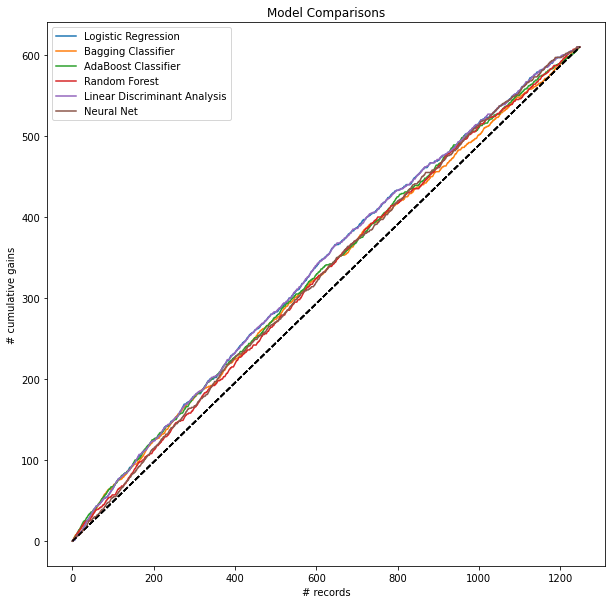

In [218]:
# Plot
ax = gainsChart(lr_result.actual, label='Logistic Regression', color='C0', figsize=[10, 10])
ax = gainsChart(bc_result.actual, label='Bagging Classifier', color='C1', ax=ax)
ax = gainsChart(ada_result.actual, label='AdaBoost Classifier', color='C2', ax=ax)
ax = gainsChart(rf_result.actual, label='Random Forest', color='C3', ax=ax)
ax = gainsChart(lda_result.actual, label='Linear Discriminant Analysis', color='C4', ax=ax)
ax = gainsChart(nn_result.actual, label='Neural Net', color='C5', ax=ax)
ax.legend()
ax.set_title('Model Comparisons')

plt.show()

---
**Answer:** <br>
We’ve been asked to the following three model methods: Logistic Regression with regularization (LR), Bagging Classification (BC), Adaboost Classification (ADA), Random Forest (RF), Linear Discriminant Analysis (LDA), and Neural Net (NN). We normalized all of our features. All features were used and all models had default settings except for our Logistic Regression and Neural Net models. With these models we did cross validation to optimize some of our available hyperparameters.

---

### Question 2.2
Classification under asymmetric response and cost: What is the reasoning behind using weighted sampling to produce a training set with equal numbers of donors and non-donors? Why not use a simple random sample from the original dataset? (10
Points)


---
**Answer:** <br>

The purpose of doing classification under asymmetric response and cost is help the model to discriminate between the classes using features rather than prioritize class assignment on classes with the most occurrences. This methodology puts the importance of feature differentiation ahead of class weights.


---

### Question 2.3 
Calculate net profit: For each method, calculate the cumulative gains of net profit for both the training and validation sets based on the actual response rate (5.1%). Again, the expected donation, given that they are donors, is \$13.00, and the total cost of each mailing is \$0.68. (Hint: To calculate estimated net profit, we will need to undo the effects of the weighted sampling and calculate the net profit that would reflect the actual response distribution of 5.1% donors and 94.9% non-donors. To do this, divide each row’s net profit by the oversampling weights applicable to the actual status of that row. The oversampling weight for actual donors is 50%/5.1% = 9.8. The oversampling weight for actual non-donors is 50%/94.9% = 0.53). (10 Points)



In [224]:
len(X)

3120

In [258]:
0.051/0.5

0.102

In [325]:
# Helper Functions
def gains_data_prep(df_org, model, X=X, orig_response_rate = 0.051, new_rr = 0.5, avgRevenue = 13.0, avgCost = 0.68):
  X_norm = scaler.transform(X)
  proba = model.predict_proba(X_norm)
  result = pd.DataFrame({'actual': y.astype("int64"), 
                         'p(0)': [p[0] for p in proba],
                         'p(1)': [p[1] for p in proba],
                         'predicted': model.predict(X_norm)
                         })
  scoreAnalysis = df_org.join(result)
  avg_profit = avgRevenue - avgCost
  response_rate = orig_response_rate/new_rr
  rr = response_rate
  scoreAnalysis['donationProbability'] = model.predict_proba(X_norm)[:,1]
  scoreAnalysis['adj_net_profit'] = scoreAnalysis['predicted'].apply(lambda x: (13 - .68)*(0.051/0.5) if x==1 else (-0.68)*(0.949/0.5) )
  scoreAnalysis['adj_net_profit(inverse)'] = scoreAnalysis['predicted'].apply(lambda x: (13 - .68)/(0.5/0.051) if x==1 else (-0.68)/(0.5/0.949) )
  
  scoreAnalysis = scoreAnalysis.sort_values(by=['donationProbability'], ascending=False)
  return scoreAnalysis

# Get Analysis
lr_scoreAnalysis = gains_data_prep(df_copy, lr, X)
bc_scoreAnalysis = gains_data_prep(df_copy, bc, X)
ada_scoreAnalysis = gains_data_prep(df_copy, ada, X)
rf_scoreAnalysis = gains_data_prep(df_copy, rf, X)
lda_scoreAnalysis = gains_data_prep(df_copy, lda, X)
nn_scoreAnalysis = gains_data_prep(df_copy, nn, X)

# display(lr_scoreAnalysis)
# display(bc_scoreAnalysis)
# display(ada_scoreAnalysis)
# display(rf_scoreAnalysis)
# display(lda_scoreAnalysis)
# display(nn_scoreAnalysis)

In [326]:
# Gross Profit
print('Gross Profit:')
print('Logistic Regression =', "${:,}".format(lr_scoreAnalysis['adj_net_profit'].sum().round(2)))
print('Bagging Classification =', "${:,}".format(bc_scoreAnalysis['adj_net_profit'].sum().round(2)))
print('Adaboost Classification =', "${:,}".format(ada_scoreAnalysis['adj_net_profit'].sum().round(2)))
print('Random Forest =', "${:,}".format(rf_scoreAnalysis['adj_net_profit'].sum().round(2)))
print('Linear Discriminant Analysis =', "${:,}".format(lda_scoreAnalysis['adj_net_profit'].sum().round(2)))
print('Neural Net =', "${:,}".format(nn_scoreAnalysis['adj_net_profit'].sum().round(2)))

Gross Profit:
Logistic Regression = $275.56
Bagging Classification = $-343.43
Adaboost Classification = $-238.99
Random Forest = $10.64
Linear Discriminant Analysis = $257.73
Neural Net = $-1,785.19


---
**Answer:** <br>

See above that our best performing model is Logistic Regression.

---

### Question 2.4
Draw cumulative gains curves: Draw the different models’ net profit cumulative gains curves for the validation set in a single plot (net profit on the y-axis, proportion of list or number mailed on the x-axis). Is there a model that dominates? (10 Points)


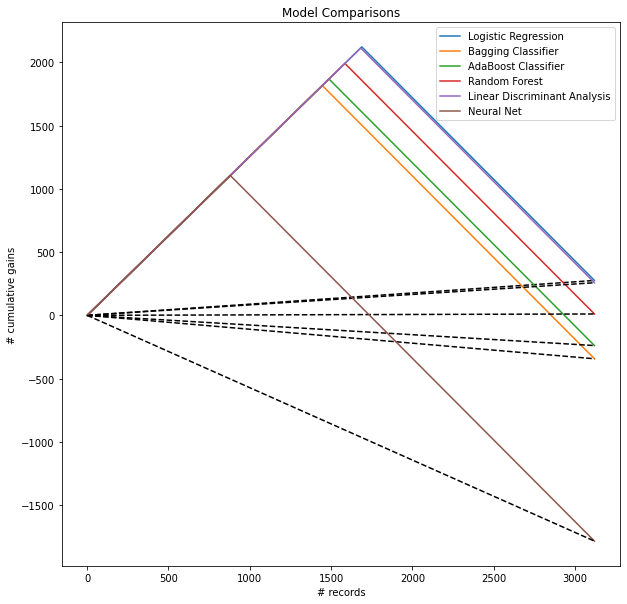

In [327]:
# Plot
ax = gainsChart(lr_scoreAnalysis.adj_net_profit, label='Logistic Regression', color='C0', figsize=[10, 10])
ax = gainsChart(bc_scoreAnalysis.adj_net_profit, label='Bagging Classifier', color='C1', ax=ax)
ax = gainsChart(ada_scoreAnalysis.adj_net_profit, label='AdaBoost Classifier', color='C2', ax=ax)
ax = gainsChart(rf_scoreAnalysis.adj_net_profit, label='Random Forest', color='C3', ax=ax)
ax = gainsChart(lda_scoreAnalysis.adj_net_profit, label='Linear Discriminant Analysis', color='C4', ax=ax)
ax = gainsChart(nn_scoreAnalysis.adj_net_profit, label='Neural Net', color='C5', ax=ax)
ax.legend()
ax.set_title('Model Comparisons')

plt.show()

---
**Answer:** <br>

See above that our best performing model is Logistic Regression.

---

### Question 2.5
Select the best model: From your answer in (4), what do you think is the “best” model? (12 Points)


---
**Answer:** <br>

I beleive that the two best models are Logistic Regression, followed by LDA as a close second.

---

## Question 3
**Testing:** The file FutureFundraising.csv contains the attributes for future mailing candidates.

### Question 3.1
Using your “best” model from Step 2 (number 5), which of these candidates do you predict as donors and non-donors? List them in descending order of the probability of being a donor. Starting at the top of this sorted list, roughly how far down would you go in a mailing campaign? (10 Points)


In [330]:
ff_df = pd.read_csv(FutureFundraising)
ff_df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,3,0,1,0,0,1,1,1,1,...,3,42,92.0,29.0,15.0,17,8,15.333333,NaN,NaN
1,2,4,0,0,1,0,0,1,2,1,...,4,21,30.0,20.0,20.0,33,9,15.000000,NaN,NaN
2,3,5,0,0,0,1,0,1,1,0,...,10,61,220.0,35.0,25.0,31,9,24.444444,NaN,NaN
3,4,1,0,0,0,0,1,1,4,0,...,21,32,41.0,19.0,19.0,31,13,13.666667,NaN,NaN
4,5,4,0,0,1,0,1,1,7,1,...,1,47,46.0,10.0,10.0,28,8,5.750000,NaN,NaN


In [331]:
ff_df_copy = ff_df.copy()

ff_df_copy.columns = [d.replace(' ', '_').replace('.', '') for d in ff_df_copy.columns]
ff_df_copy = ff_df_copy.iloc[: , 2:]
# df_copy = df_copy.drop('TARGET_D', axis=1)
ff_df_copy.head()

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,0,1,0,0,1,1,1,1,8,923,...,3,42,92.0,29.0,15.0,17,8,15.333333,NaN,NaN
1,0,0,1,0,0,1,2,1,9,724,...,4,21,30.0,20.0,20.0,33,9,15.000000,NaN,NaN
2,0,0,0,1,0,1,1,0,4,1153,...,10,61,220.0,35.0,25.0,31,9,24.444444,NaN,NaN
3,0,0,0,0,1,1,4,0,1,551,...,21,32,41.0,19.0,19.0,31,13,13.666667,NaN,NaN
4,0,0,1,0,1,1,7,1,9,2214,...,1,47,46.0,10.0,10.0,28,8,5.750000,NaN,NaN


In [339]:
# separate target and predictors
y = ff_df_copy['TARGET_B'].to_numpy()
X = ff_df_copy.drop(['TARGET_B', 'TARGET_D'], axis=1)


In [341]:
X_norm = scaler.transform(X)
pred_y = lr.predict_proba(X_norm)

In [354]:
lr_model_proba = lr.predict_proba(X_norm)
pred_results = pd.DataFrame({'p(0)': [p[0] for p in lr_model_proba],
                          'p(1)': [p[1] for p in lr_model_proba],
                          'predicted': lr.predict(X_norm),

                        })
pred_results = pred_results.sort_values(by=['p(1)'], ascending=False)

pred_results['marginalRevenue'] = pred_results['predicted'].apply(lambda x: (13)/(0.5/0.051) if x==1 else (0)/(0.5/0.949) )
pred_results['marginalCosts'] = pred_results['predicted'].apply(lambda x: (-0.68)/(0.5/0.051) if x==1 else (-0.68)/(0.5/0.949) )
pred_results['total'] = pred_results['predicted'].apply(lambda x: (13 - .68)/(0.5/0.051) if x==1 else (-0.68)/(0.5/0.949) )
pred_results['netProfit'] = pred_results['marginalRevenue'] + pred_results['marginalCosts']
pred_results['cumProfit'] = pred_results['netProfit'].cumsum()
pred_results


,p(0),p(1),predicted,marginalRevenue,marginalCosts,total,netProfit,cumProfit
1013,0.224800,0.775200,1,1.326,-0.06936,1.25664,1.25664,1.25664
721,0.225051,0.774949,1,1.326,-0.06936,1.25664,1.25664,2.51328
119,0.235727,0.764273,1,1.326,-0.06936,1.25664,1.25664,3.76992
55,0.239903,0.760097,1,1.326,-0.06936,1.25664,1.25664,5.02656
25,0.244639,0.755361,1,1.326,-0.06936,1.25664,1.25664,6.28320
...,...,...,...,...,...,...,...,...
835,0.926304,0.073696,0,0.000,-1.29064,-1.29064,-1.29064,-51.76296
23,0.928075,0.071925,0,0.000,-1.29064,-1.29064,-1.29064,-53.05360
1852,0.928275,0.071725,0,0.000,-1.29064,-1.29064,-1.29064,-54.34424
1813,0.933665,0.066335,0,0.000,-1.29064,-1.29064,-1.29064,-55.63488


In [356]:
profit_max = pred_results[pred_results['cumProfit'] == pred_results['cumProfit'].max()].index[0]
profit_max

1407

In [358]:
# Profit Maximizing point
profit_max

1407

---
**Answer:** <br>

Econ 101 says we will optimize profits when our marginal costs equals our marginal revenue. That being said, I would contact the first 1407 prospects to maximize profitability from this list.

---

### Question 3.2
Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. (14 Points)

---
**Answer:** <br>

Our main business objective is that the national veterans’ organization wants us to develop a predictive model to improve the cost-effectiveness of their direct marketing campaigns. For this project we tried six algorithms: Logistic Regression with regularization (LR), Bagging Classification (BC), Adaboost Classification (ADA), Random Forest (RF), Linear Discriminant Analysis (LDA), and Neural Net (NN). We used the aforementioned models because we were assigned to do so and because our assignment is a classification problem and these were classification algorithms. 

Our recommendations for our stakeholders are as follows: 
•	Use the Logistic Regression model because it showed the highest lift.  
•	Consider looking for an optimal cutoff where the marketing costs are minimized, and the profitability is maximized. Using 0.5 seems arbitrary at this point.


---